# Porto seguro's safe Drivers prediction

This is from the kaggle competition. you will find problem [here](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction)

In [1]:
# import libraries
import pandas as pd
import numpy as np

#import visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#load dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.shape, test.shape

((595212, 59), (892816, 58))

In [3]:
# explore data set
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


**Lets figure out the TARGET variable**

In [4]:
train['target'].value_counts()

0    573518
1     21694
Name: target, dtype: int64

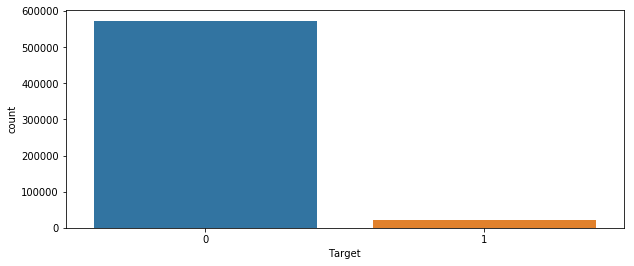

In [5]:
plt.figure(figsize=(10, 4))
sns.countplot(train['target'])
plt.xlabel('Target')

### Correlation plot

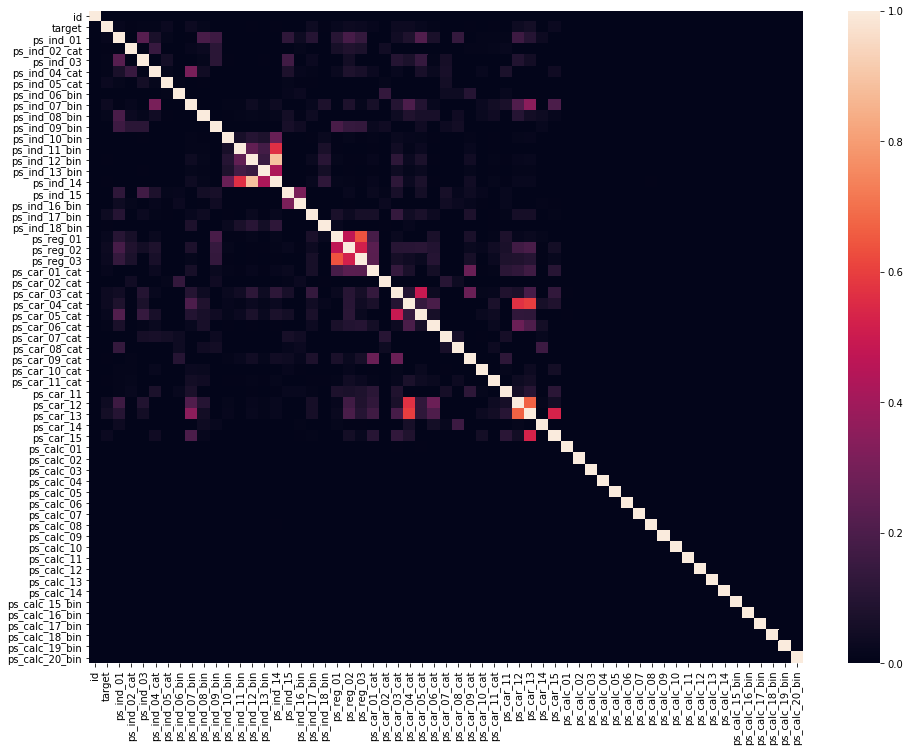

In [6]:
plt.figure(figsize=(16, 12))
sns.heatmap(train.corr(), vmin=0, vmax=1)

in the above figure if you observe, all the **ps_calc_** features have **Zero** correlation with each other. Its better to remove all those features to get more accurate results.

In [7]:
ps_calc = train.columns[train.columns.str.startswith('ps_calc')]

train = train.drop(ps_calc, axis=1)
test = test.drop(ps_calc, axis=1)

In [8]:
train.shape, test.shape

((595212, 39), (892816, 38))

### Missing values in the each train and test

In [9]:
k= pd.DataFrame()
k['train']= train.apply(lambda x: sum(x.values== -1))
k['test'] = test.apply(lambda x: sum(x.values== -1))
k

,train,test
id,0,0.0
target,0,NaN
ps_ind_01,0,0.0
ps_ind_02_cat,216,307.0
ps_ind_03,0,0.0
ps_ind_04_cat,83,145.0
ps_ind_05_cat,5809,8710.0
ps_ind_06_bin,0,0.0
ps_ind_07_bin,0,0.0
ps_ind_08_bin,0,0.0


Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.

In [10]:
for i in train.columns:
    train[i].replace(-1, train[i].mode()[0], inplace=True)

In [11]:
for i in test.columns:
    test[i].replace(-1, test[i].mode()[0], inplace=True)

In [12]:
def replace_values(df):
    df['ps_reg_03'].replace(-1.0, 0, inplace=True)
    df['ps_car_03_cat'].replace(-1.0, 0, inplace=True)
    df['ps_car_05_cat'].replace(-1.0, 0, inplace=True)
    df['ps_car_14'].replace(-1.0, 0, inplace=True)
    
replace_values(train)
replace_values(test)

In [13]:
for i in train.columns:
    print ('\n unique values of {} : {} '  .format(i, train[i].nunique()))


 unique values of id : 595212 

 unique values of target : 2 

 unique values of ps_ind_01 : 8 

 unique values of ps_ind_02_cat : 4 

 unique values of ps_ind_03 : 12 

 unique values of ps_ind_04_cat : 2 

 unique values of ps_ind_05_cat : 7 

 unique values of ps_ind_06_bin : 2 

 unique values of ps_ind_07_bin : 2 

 unique values of ps_ind_08_bin : 2 

 unique values of ps_ind_09_bin : 2 

 unique values of ps_ind_10_bin : 2 

 unique values of ps_ind_11_bin : 2 

 unique values of ps_ind_12_bin : 2 

 unique values of ps_ind_13_bin : 2 

 unique values of ps_ind_14 : 5 

 unique values of ps_ind_15 : 14 

 unique values of ps_ind_16_bin : 2 

 unique values of ps_ind_17_bin : 2 

 unique values of ps_ind_18_bin : 2 

 unique values of ps_reg_01 : 10 

 unique values of ps_reg_02 : 19 

 unique values of ps_reg_03 : 5013 

 unique values of ps_car_01_cat : 12 

 unique values of ps_car_02_cat : 2 

 unique values of ps_car_03_cat : 2 

 unique values of ps_car_04_cat : 10 

 uniq

### Univariate analysis


In [14]:
cat_cols = [col for col in train.columns if '_cat' in col]
cat_cols

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

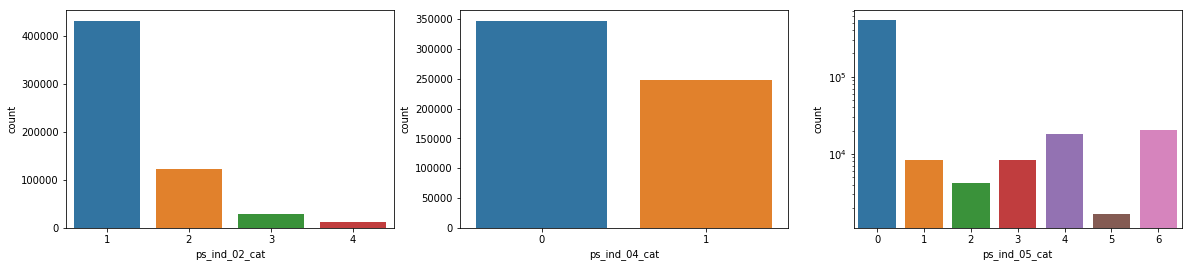

In [15]:
fig, ax = plt.subplots(1, 3, figsize = (20, 4))
ax1, ax2, ax3 = ax.flatten()
sns.countplot(train['ps_ind_02_cat'], ax=ax1)
sns.countplot(train['ps_ind_04_cat'], ax=ax2)
sns.countplot(train['ps_ind_05_cat'], ax=ax3.set_yscale('log'))

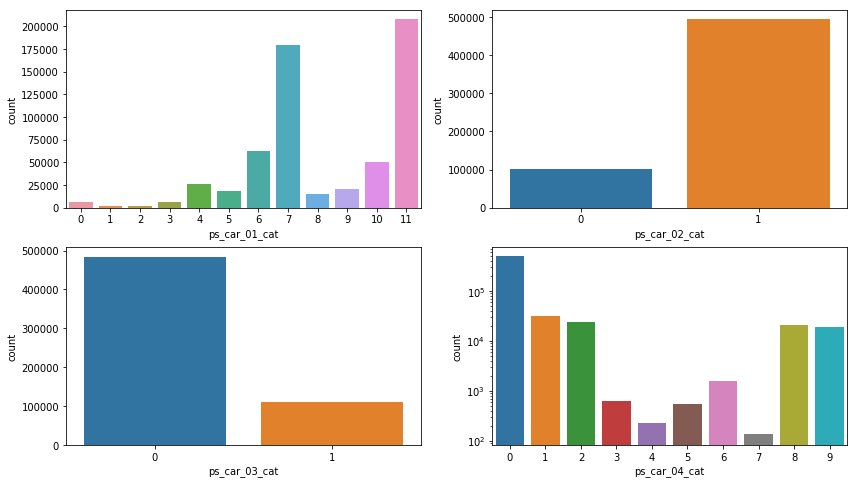

In [16]:
fig, ax = plt.subplots(2, 2,figsize=(14, 8))
ax1, ax2, ax3, ax4 = ax.flatten()
sns.countplot(train['ps_car_01_cat'], ax=ax1)
sns.countplot(train['ps_car_02_cat'], ax=ax2)
sns.countplot(train['ps_car_03_cat'], ax=ax3)
sns.countplot(train['ps_car_04_cat'], ax=ax4.set_yscale('log'))

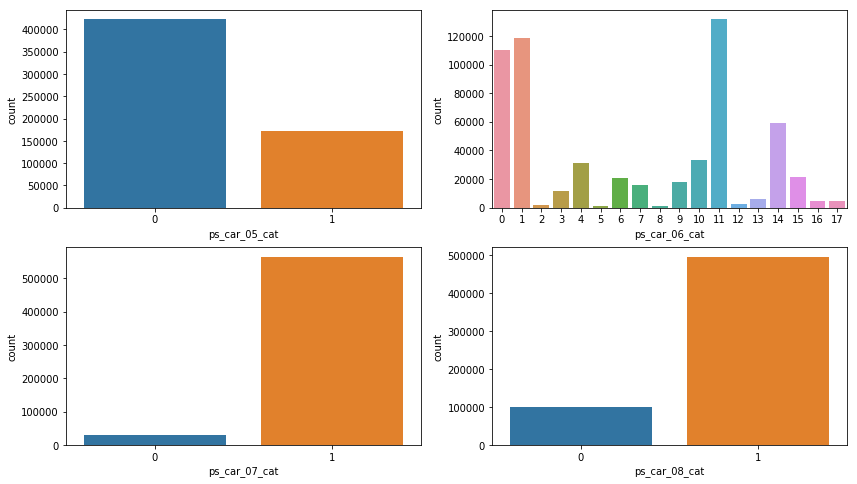

In [17]:
fig, ax = plt.subplots(2, 2,figsize=(14, 8))
ax1, ax2, ax3, ax4 = ax.flatten()
sns.countplot(train['ps_car_05_cat'], ax=ax1)
sns.countplot(train['ps_car_06_cat'], ax=ax2)
sns.countplot(train['ps_car_07_cat'], ax=ax3)
sns.countplot(train['ps_car_08_cat'], ax=ax4)

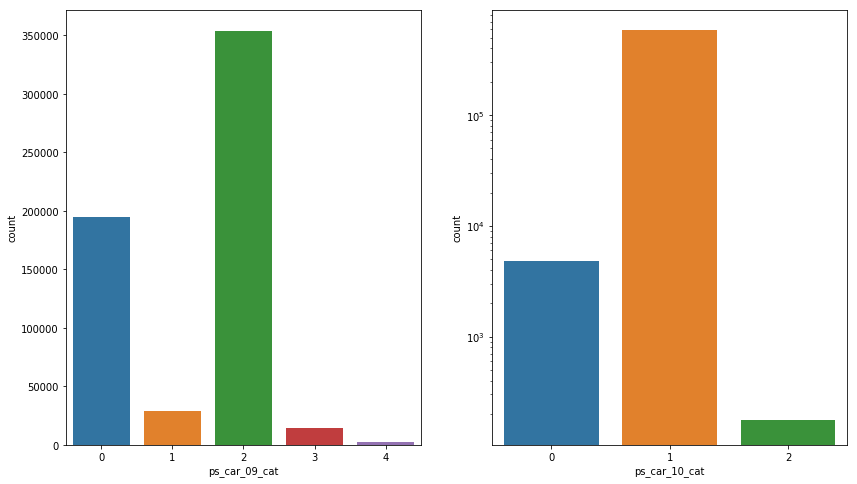

In [18]:
fig, ax = plt.subplots(1, 2,figsize=(14, 8))
ax1, ax2= ax.flatten()
sns.countplot(train['ps_car_09_cat'], ax=ax1)
sns.countplot(train['ps_car_10_cat'], ax=ax2.set_yscale('log'))

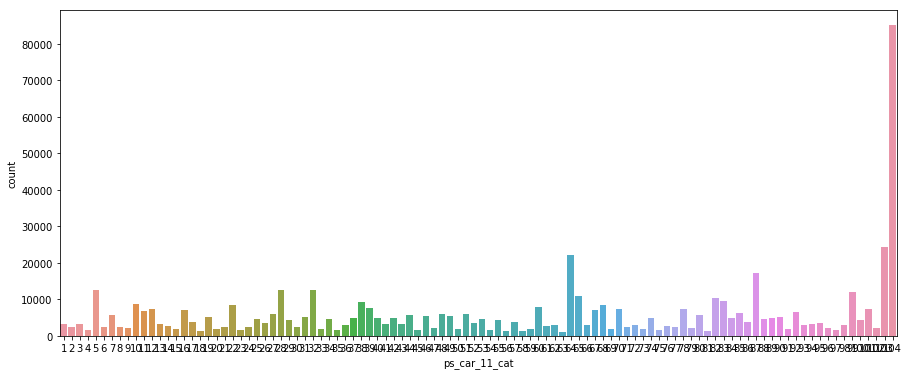

In [19]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(train['ps_car_11_cat'], ax=ax)

### bin columns

In [20]:
bin_cols = [col for col in train.columns if '_bin' in col]
bin_cols

['ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin']

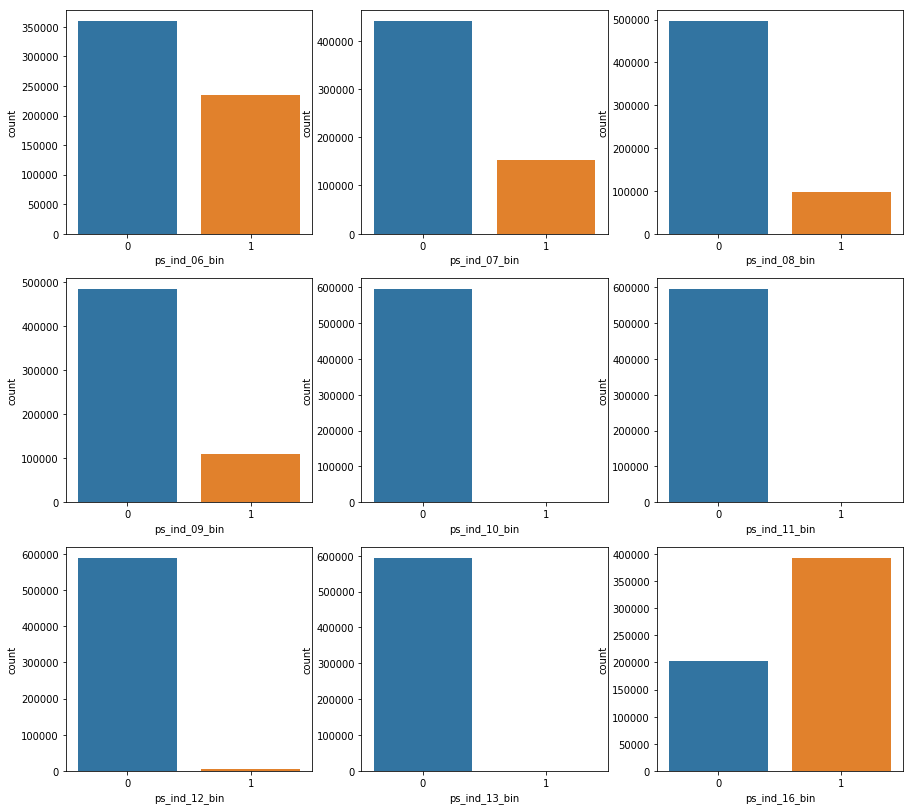

In [21]:
fig, ax = plt.subplots(3, 3, figsize=(15, 14))
ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9 = ax.flatten()
sns.countplot(train['ps_ind_06_bin'], ax=ax1)
sns.countplot(train['ps_ind_07_bin'], ax=ax2)
sns.countplot(train['ps_ind_08_bin'], ax=ax3)
sns.countplot(train['ps_ind_09_bin'], ax=ax4)
sns.countplot(train['ps_ind_10_bin'], ax=ax5)
sns.countplot(train['ps_ind_11_bin'], ax=ax6)
sns.countplot(train['ps_ind_12_bin'], ax=ax7)
sns.countplot(train['ps_ind_13_bin'], ax=ax8)
sns.countplot(train['ps_ind_16_bin'], ax=ax9)

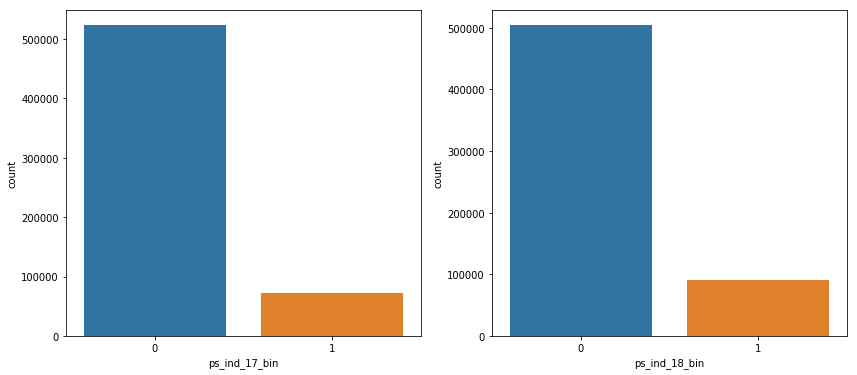

In [22]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
ax1,ax2 = ax.flatten()
sns.countplot(train['ps_ind_17_bin'],ax=ax1)
sns.countplot(train['ps_ind_18_bin'],ax=ax2)

In [23]:
other_cat_cols = ['ps_ind_01','ps_ind_03','ps_ind_14','ps_ind_15','ps_reg_01','ps_reg_02','ps_car_11','ps_car_15']

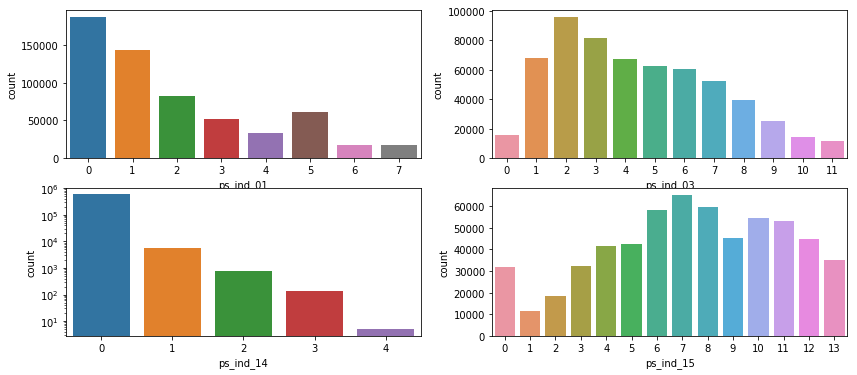

In [24]:
fig, ax = plt.subplots(2,2, figsize=(14, 6))
ax1, ax2, ax3, ax4 = ax.flatten()
sns.countplot(train['ps_ind_01'], ax=ax1)
sns.countplot(train['ps_ind_03'], ax=ax2)
sns.countplot(train['ps_ind_14'], ax=ax3)
ax3.set_yscale('log')
sns.countplot(train['ps_ind_15'], ax=ax4)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

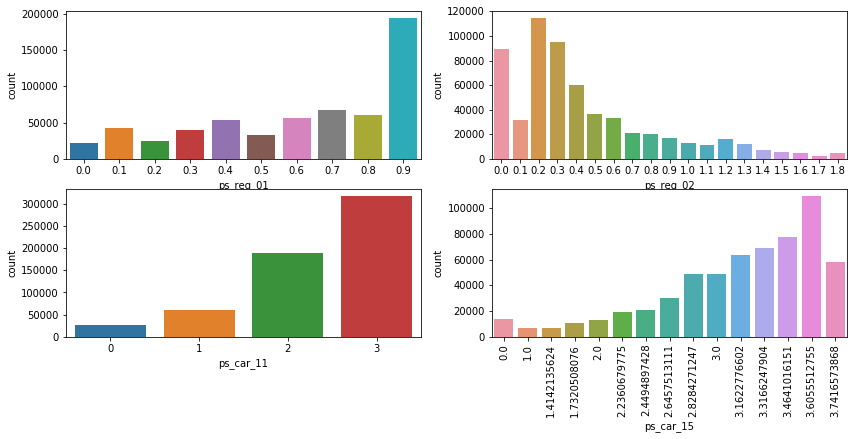

In [25]:
fig, ax = plt.subplots(2,2, figsize=(14, 6))
ax1, ax2, ax3, ax4 = ax.flatten()
sns.countplot(train['ps_reg_01'], ax=ax1)
sns.countplot(train['ps_reg_02'], ax=ax2)
sns.countplot(train['ps_car_11'], ax=ax3)
sns.countplot(train['ps_car_15'], ax=ax4)
plt.xticks(rotation=90)

In [26]:
num_cols = ['ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15']

In [27]:
train['ps_reg_03'].describe()

count    595212.000000
mean          0.732167
std           0.465006
min           0.000000
25%           0.525000
50%           0.720677
75%           1.000000
max           4.037945
Name: ps_reg_03, dtype: float64

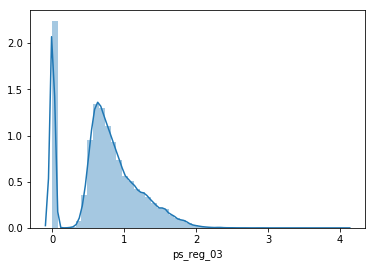

In [28]:
sns.distplot(train['ps_reg_03'],bins=50)

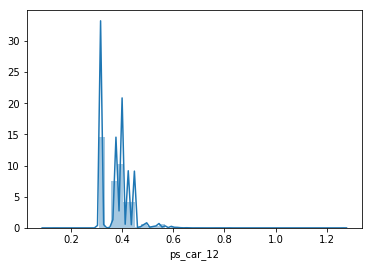

In [29]:
sns.distplot(train['ps_car_12'], bins=50)

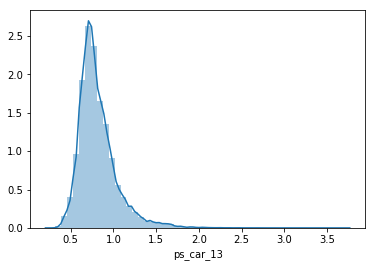

In [30]:
sns.distplot(train['ps_car_13'], bins=50)

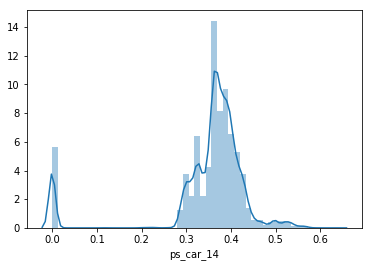

In [31]:
sns.distplot(train['ps_car_14'], bins=50)

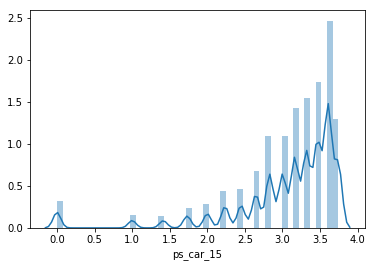

In [32]:
sns.distplot(train['ps_car_15'], bins=50)

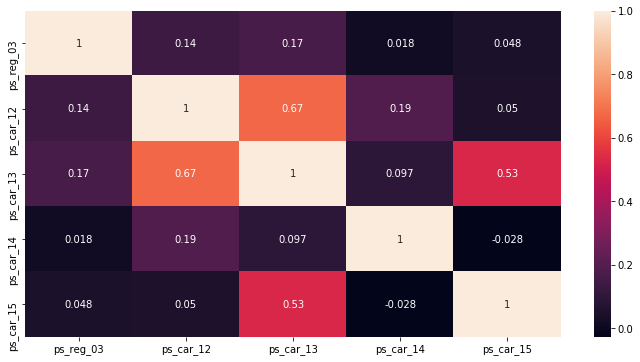

In [33]:
plt.figure(figsize=(12, 6))
sns.heatmap(train[num_cols].corr(), annot=True)

In [34]:
train.shape, test.shape

((595212, 39), (892816, 38))

In [35]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15
0,7,0,2,2,5,1,0,0,1,0,...,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551
1,9,0,1,1,7,0,0,0,0,1,...,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490
2,13,0,5,4,9,1,0,0,0,1,...,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625
3,16,0,0,1,2,0,0,1,0,0,...,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000
4,17,0,0,2,0,1,0,1,0,0,...,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000


In [36]:
test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15
0,0,0,1,8,1,0,0,1,0,0,...,1,1,2,1,65,1,0.316228,0.669556,0.352136,3.464102
1,1,4,2,5,1,0,0,0,0,1,...,1,1,0,1,103,1,0.316228,0.606320,0.358329,2.828427
2,2,5,1,3,0,0,0,0,0,1,...,1,1,2,1,29,3,0.400000,0.896239,0.398497,3.316625
3,3,0,1,6,0,0,1,0,0,0,...,1,1,2,1,40,2,0.374166,0.652110,0.381445,2.449490
4,4,5,1,7,0,0,0,0,0,1,...,1,1,2,1,101,3,0.374166,0.812914,0.385097,3.316625


In [37]:
## making separate files for modified train and test data.so that we dont have to make the above steps everytime.

#train.to_csv('train_modified.csv', index=False)
#test.to_csv('test_modified.csv', index=False)

## different models

In [38]:
## split the train and test data

y_train = train['target'].values
id_train = train['id'].values
id_test = test['id'].values

In [39]:
x_train = train.drop(['id', 'target'], axis=1)
x_test = test.drop('id', axis=1)

In [40]:
# take 20% as validation data
from sklearn.cross_validation import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

/home/ganesh/ml/env/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
import xgboost as xgb

#convert our data into xgboost format
d_train = xgb.DMatrix(x_train, y_train)
d_valid = xgb.DMatrix(x_valid, y_valid)
d_test = xgb.DMatrix(x_test)

#xgb parameters
params = {'objective': 'binary:logistic', 'eta':0.02, 'silent':True, 'max_depth':6, 'subsample':0.9, 
         'colsample_bytree' : 0.9}

In [42]:
#gini metric calculation
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)


# creating xgboost compatible metric from gini

def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = gini_normalized(labels, preds)
    return [('gini', gini_score)]

In [43]:
## this is the data xgboost will test on
watchlist = [(d_train, 'train'), (d_valid, 'valid')]

#training the model, we pass 10,000 rounds with early_stoppings as 100

mdl = xgb.train(params, d_train, 10000, watchlist, early_stopping_rounds=100, feval=gini_xgb, maximize=True,
                verbose_eval=10)

[0]	train-gini:0.221241	valid-gini:0.213706
Multiple eval metrics have been passed: 'valid-gini' will be used for early stopping.

Will train until valid-gini hasn't improved in 100 rounds.
[10]	train-gini:0.253485	valid-gini:0.241022
[20]	train-gini:0.264912	valid-gini:0.249366
[30]	train-gini:0.267774	valid-gini:0.249947
[40]	train-gini:0.269734	valid-gini:0.251094
[50]	train-gini:0.272501	valid-gini:0.251477
[60]	train-gini:0.27473	valid-gini:0.25303
[70]	train-gini:0.276119	valid-gini:0.253351
[80]	train-gini:0.278229	valid-gini:0.254615
[90]	train-gini:0.281268	valid-gini:0.255641
[100]	train-gini:0.285582	valid-gini:0.257789
[110]	train-gini:0.287761	valid-gini:0.258272
[120]	train-gini:0.290376	valid-gini:0.25936
[130]	train-gini:0.293698	valid-gini:0.260595
[140]	train-gini:0.297819	valid-gini:0.262289
[150]	train-gini:0.302552	valid-gini:0.264202
[160]	train-gini:0.306968	valid-gini:0.265523
[170]	train-gini:0.311381	valid-gini:0.267481
[180]	train-gini:0.315777	valid-gini:0.2

In [44]:
#predict on test data
pred_test = mdl.predict(d_test)

In [45]:
# creating a submission file
sub = pd.DataFrame()
sub['id'] = id_test
sub['target'] = pred_test
sub.to_csv('xgb_submission.csv', index=False)

### To be continued with different models